# This project uses Lower Back Pain Symptoms Dataset from Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
print ("Hello Capstone Project Course!")

Hello Capstone Project Course!


# Load the dataset

In [3]:
df = pd.read_csv("Dataset_spine.csv")

In [4]:
df

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal,NaN
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal,NaN
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal,NaN
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal,NaN


# Exploratory Data Analysis

### the column  class_att is the prediction. It contains

1. Abnormal and 

2. Normal

The task is to predict based on Col1 to Col12. Note: there are 12 feature columns and one target column to predict.

* The features are 
* pelvic_incidence
* pelvic tilt
* lumbar_lordosis_angle
* sacral_slope
* pelvic_radius
* degree_spondylolisthesis
* pelvic_slope
* direct_tiltthoracic_slope
* cervical_tilt
* sacrum_angle
* scoliosis_slope


## Drop the unnamed column

In [5]:
df.drop(columns=['Unnamed: 13'], inplace=True)

In [6]:
df.columns = ["pelvic_incidence", "pelvic tilt", "lumbar_lordosis_angle", "sacral_slope", 
"pelvic_radius", "degree_spondylolisthesis", "pelvic_slope", "direct_tilt", "thoracic_slope", 
"cervical_tilt", "sacrum_angle", "scoliosis_slope","class_att"]

## Count the missing values

In [7]:
df.isnull().sum()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
class_att                   0
dtype: int64

In [8]:
df['class_att'].value_counts()

Abnormal    210
Normal      100
Name: class_att, dtype: int64

### The target class values are imballanced

<AxesSubplot:>

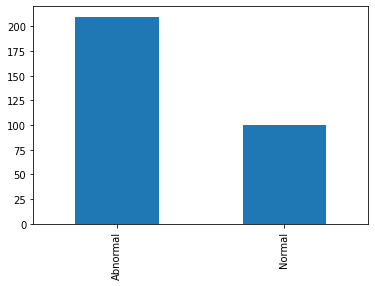

In [9]:
df["class_att"].value_counts().sort_index().plot.bar()

In [10]:
df

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [11]:
df.describe()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


### We can see few outliers in the dataset

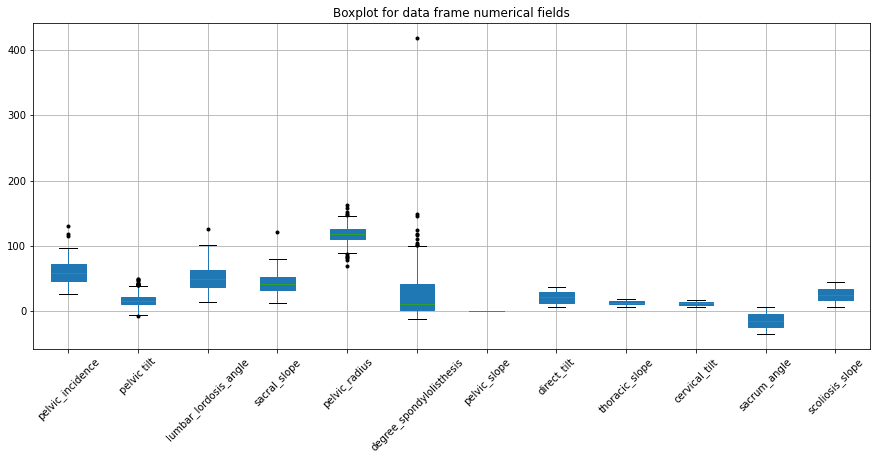

In [12]:
plt.subplots(figsize=(15,6))
df.boxplot(patch_artist=True, sym="k.")
plt.title("Boxplot for data frame numerical fields")
plt.xticks(rotation=45);

### Using sns pair plot we see many attributes have no correlations

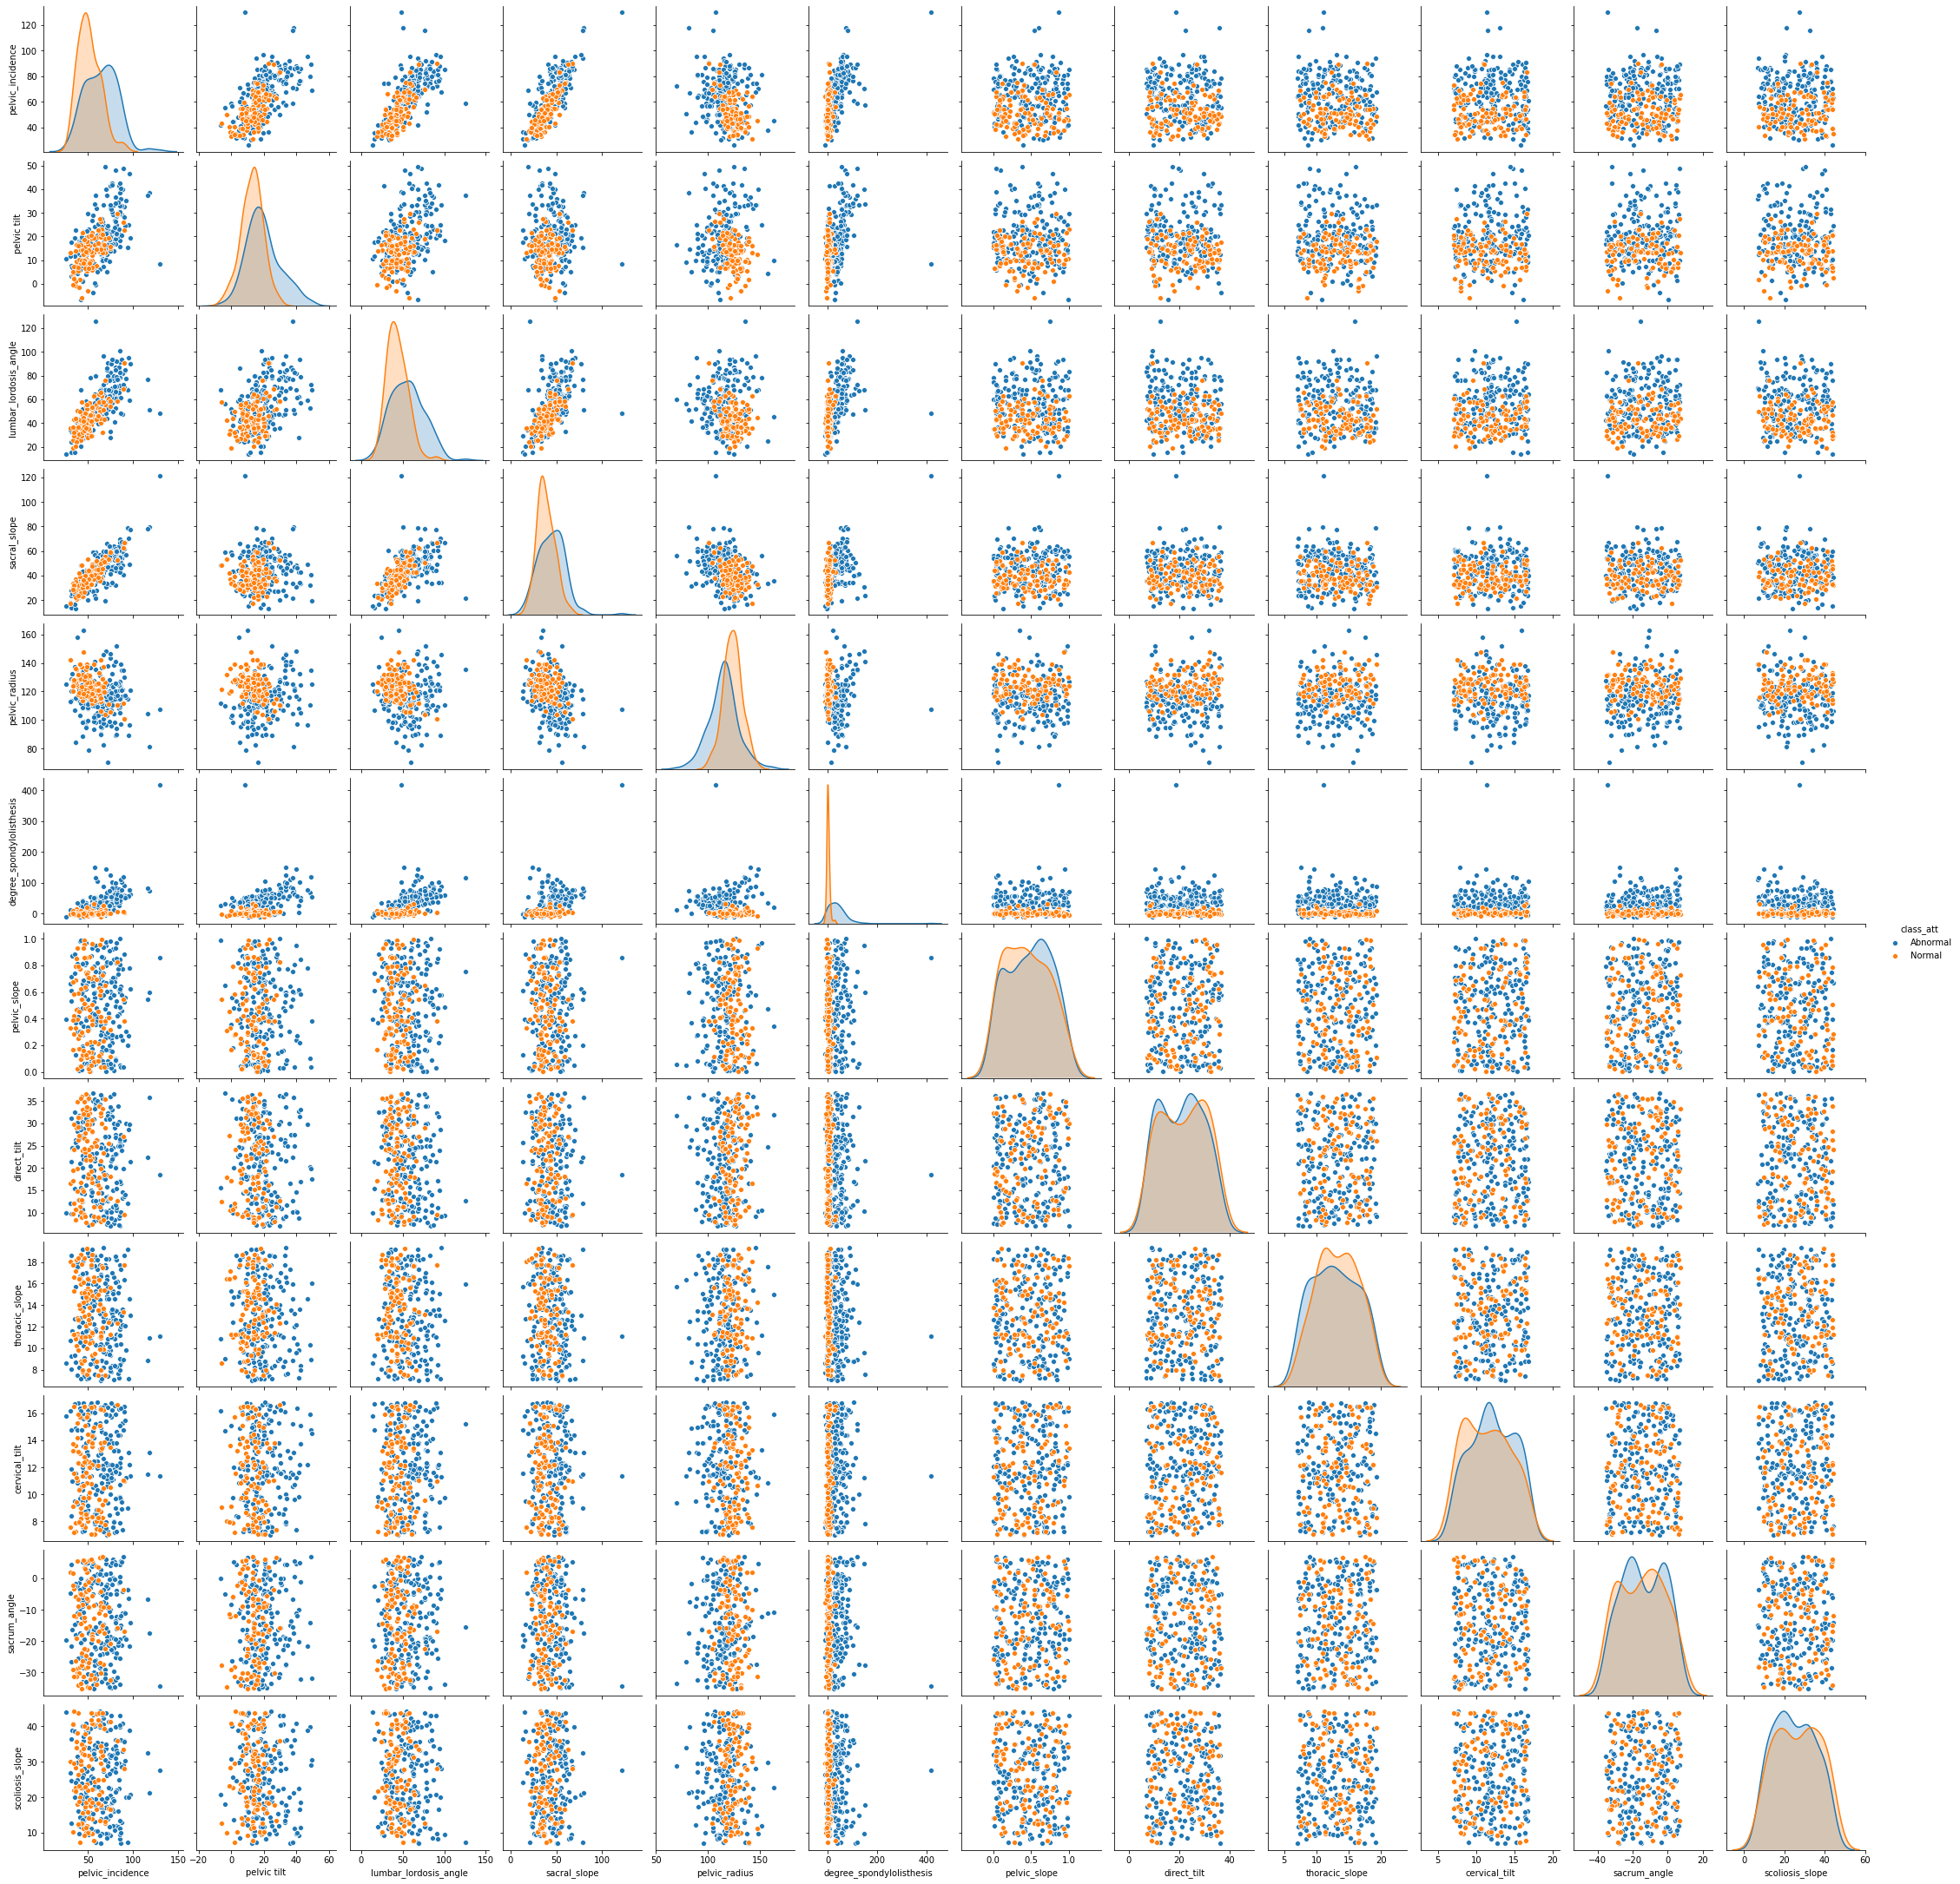

In [13]:
sns.pairplot(df, hue="class_att")

<AxesSubplot:>

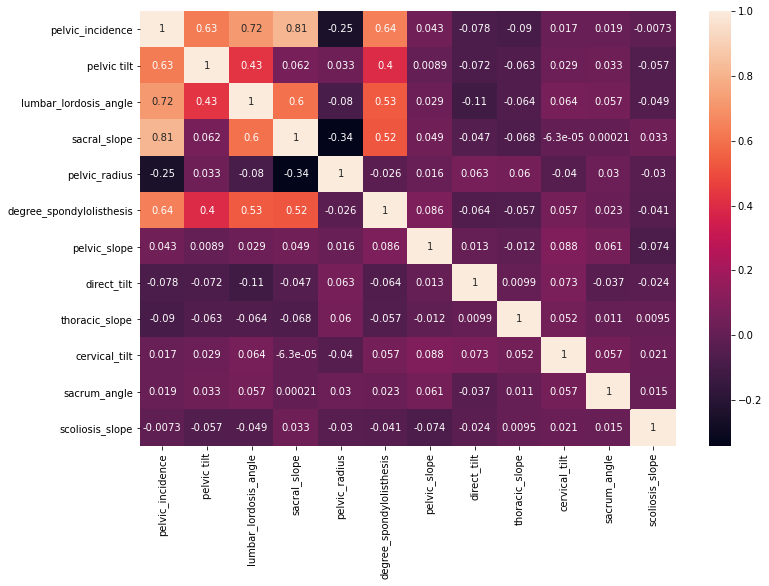

In [14]:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

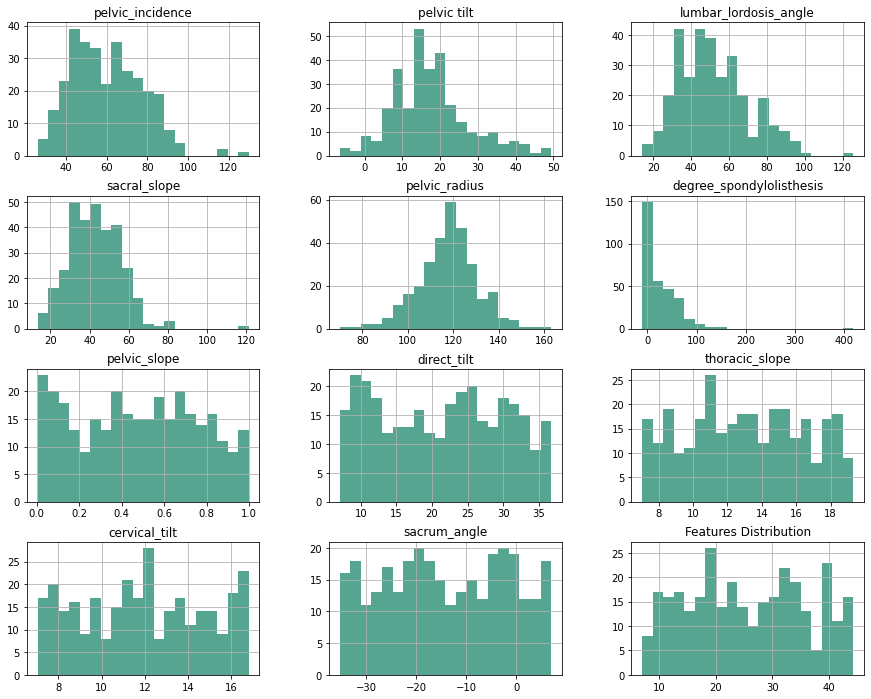

In [15]:
df.hist(figsize=(15,12),bins = 20, color="#007959AA")
plt.title("Features Distribution")
plt.show()

# Data preparation

### Data needs to be normalized

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
scalar = StandardScaler()

In [18]:
X = df.drop(["class_att"],axis=1)
y = df['class_att']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, stratify=y, random_state=42)

In [20]:
print(len(X_train),len(y_train),len(X_test),len(y_test))

248 248 62 62


# Model Development and Evaluation

### SVC Classifier

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [22]:
pipesvc = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipesvc.fit(X_train,y_train)
pipesvc.score(X_test, y_test)
y_pred = pipesvc.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[36,  6],
       [ 6, 14]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.86      0.86      0.86        42
      Normal       0.70      0.70      0.70        20

    accuracy                           0.81        62
   macro avg       0.78      0.78      0.78        62
weighted avg       0.81      0.81      0.81        62



### DecisionTree classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
pipedtc = Pipeline([('scaler', StandardScaler()), ('svc', DecisionTreeClassifier(random_state=0))])
pipedtc.fit(X_train,y_train)
pipedtc.score(X_test, y_test)
y_pred = pipedtc.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[33,  9],
       [ 5, 15]], dtype=int64)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.87      0.79      0.82        42
      Normal       0.62      0.75      0.68        20

    accuracy                           0.77        62
   macro avg       0.75      0.77      0.75        62
weighted avg       0.79      0.77      0.78        62



# Deployment

# Size of SVC classifier on disk

In [29]:
from joblib import dump, load
dump(pipesvc, 'pipesvc.pkl') 
!dir pipesvc.pkl

 Volume in drive C is OS
 Volume Serial Number is AC8D-7FA8

 Directory of C:\Users\Ashok_Potti\Downloads\Personal\Coursera_new\IBM Data Science\02-Applied Data Science\04-Applied Data Science Capstone

08/26/2020  11:18 PM            20,608 pipesvc.pkl
               1 File(s)         20,608 bytes
               0 Dir(s)  216,671,903,744 bytes free


In [30]:
loaded_model = load('pipesvc.pkl')

In [31]:
loaded_model.score(X_test, y_test)

0.8064516129032258

# Size of Decision Tree Classifier on disk

In [32]:
dump(pipedtc, 'pipedtc.pkl') 
!dir pipedtc.pkl

 Volume in drive C is OS
 Volume Serial Number is AC8D-7FA8

 Directory of C:\Users\Ashok_Potti\Downloads\Personal\Coursera_new\IBM Data Science\02-Applied Data Science\04-Applied Data Science Capstone

08/26/2020  11:18 PM             6,991 pipedtc.pkl
               1 File(s)          6,991 bytes
               0 Dir(s)  216,671,903,744 bytes free


# Conclusion

### The accuracy of SVC classifier is 4% more than Decision Tree Classifier.
### But the size of SVC is 20k bytes compared to 7k by Decision tree classifier.

### Hence for premium device SVC model will be deployed and for mid-range device Decision Tree classifier will be deployed.